# 🎓 Gaussian Fitting and Peak Detection
Welcome to this interactive notebook for exploring Gaussian fitting and peak detection.

In this notebook, you will:
- Upload your own data file (.csv or .xls)
- Select which columns represent X and Y
- Detect peaks in your data
- Fit your data to a sum of Gaussian curves
- Evaluate fit quality using statistics
- Export results and plots

Let's get started!

In [1]:
# 📦 Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from ipywidgets import interact, widgets, fixed
from IPython.display import display, clear_output
from datetime import datetime
import io
from google.colab import files

from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows


## 📁 Upload Your Data File
Use the widget below to upload a `.csv` or `.xls` file containing your data.

In [2]:
# Upload file
uploaded = files.upload()

# Load the file into a DataFrame
for fname in uploaded:
    if fname.endswith('.csv'):
        df = pd.read_csv(io.BytesIO(uploaded[fname]))
    elif fname.endswith('.xls') or fname.endswith('.xlsx'):
        df = pd.read_excel(io.BytesIO(uploaded[fname]))
    else:
        raise ValueError("Unsupported file format. Please upload a .csv or .xls file.")

print("✅ File loaded successfully!")
df.head()

Saving test_gaussian_data_2.xlsx to test_gaussian_data_2.xlsx
✅ File loaded successfully!


,X,Y,Y_noisy
0,5.800000,0.1,0.103796
1,5.801001,0.1,0.124244
2,5.802001,0.1,0.139637
3,5.803002,0.1,0.072386
4,5.804003,0.1,0.108862


## 📊 Select X and Y Columns
Choose which columns in your data represent the X and Y values for analysis.

In [3]:
# Create dropdowns for column selection
x_dropdown = widgets.Dropdown(options=df.columns.tolist(), description='X Column:')
y_dropdown = widgets.Dropdown(options=df.columns.tolist(), description='Y Column:')
display(x_dropdown, y_dropdown)

Dropdown(description='X Column:', options=('X', 'Y', 'Y_noisy'), value='X')

Dropdown(description='Y Column:', options=('X', 'Y', 'Y_noisy'), value='X')

## 🔍 Peak Detection
Detect peaks in your Y data and visualize them on a plot.

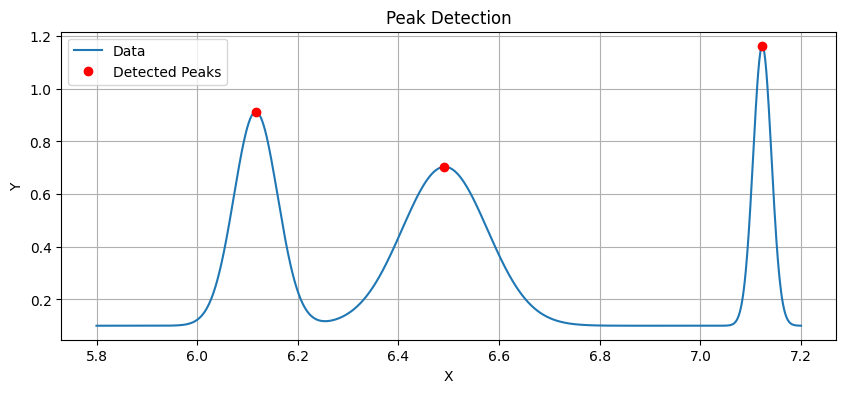

In [4]:
# Detect and plot peaks
def detect_and_plot_peaks(x_col, y_col):
    x = df[x_col].values
    y = df[y_col].values
    peaks, _ = find_peaks(y, height=np.mean(y))
    plt.figure(figsize=(10, 4))
    plt.plot(x, y, label='Data')
    plt.plot(x[peaks], y[peaks], 'ro', label='Detected Peaks')
    plt.title('Peak Detection')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()
    return peaks

peaks = detect_and_plot_peaks(x_dropdown.value, y_dropdown.value)

## ✅ Accept or Override Peak Guesses
Choose whether to use the detected peaks or manually input initial guesses.

In [5]:
# Toggle for accepting peak guesses
accept_peaks = widgets.ToggleButtons(
    options=['Accept Detected Peaks', 'Input Manually'],
    description='Peak Init:',
    style={'description_width': 'initial'}
)
display(accept_peaks)

ToggleButtons(description='Peak Init:', options=('Accept Detected Peaks', 'Input Manually'), style=ToggleButto…

## ⚙️ Baseline Toggle
Choose whether to include a baseline in the Gaussian fit.

In [6]:
# Checkbox for baseline fitting
fit_baseline = widgets.Checkbox(value=True, description='Fit Baseline')
display(fit_baseline)

Checkbox(value=True, description='Fit Baseline')

## 📈 Fit Gaussians to Data
Fit the data to a sum of Gaussians using the selected parameters.

In [7]:
# Define Gaussian model
def gaussian(x, A, mu, sigma):
    return A * np.exp(-((x - mu)**2) / (2 * sigma**2))

def multi_gaussian(x, *params):
    n = (len(params) - 1) // 3 if fit_baseline.value else len(params) // 3
    y = np.zeros_like(x)
    for i in range(n):
        A = params[3*i]
        mu = params[3*i+1]
        sigma = params[3*i+2]
        y += gaussian(x, A, mu, sigma)
    if fit_baseline.value:
        y += params[-1]
    return y

# Prepare initial guesses
x = df[x_dropdown.value].values
y = df[y_dropdown.value].values
if accept_peaks.value == 'Accept Detected Peaks':
    init_params = []
    for p in peaks:
        init_params += [y[p], x[p], 0.1]
    if fit_baseline.value:
        init_params += [np.min(y)]
else:
    num_gaussians = int(input("Enter number of Gaussians: "))
    init_params = []
    for i in range(num_gaussians):
        A = float(input(f"Amplitude {i+1}: "))
        mu = float(input(f"Mean {i+1}: "))
        sigma = float(input(f"Sigma {i+1}: "))
        init_params += [A, mu, sigma]
    if fit_baseline.value:
        init_params += [np.min(y)]

# Fit the model
popt, pcov = curve_fit(multi_gaussian, x, y, p0=init_params)
y_fit = multi_gaussian(x, *popt)




""" Plotting block, uncomment for debuging
# Generate individual Gaussians and plot
plt.figure(figsize=(10, 4))
g_curve = []
areas = []
for i in range(num_gaussians):
  plt.plot(x, g_curve[i], label=f'Gaussian {i+1})
  plt.title('Individual Gaussians')
  plt.xlabel('X')
  plt.ylabel('Y')

# Plot fit
plt.figure(figsize=(10, 4))
plt.plot(x, y, label='Data')
plt.plot(x, y_fit, 'r--', label='Gaussian Fit')
plt.title('Gaussian Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Plot residuals
plt.figure(figsize=(10, 4))
plt.plot(x, residuals, label='Residuals')
plt.title('Residuals')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

"""



" Plotting block, uncomment for debuging\n# Generate individual Gaussians and plot\nplt.figure(figsize=(10, 4))\ng_curve = []\nareas = []\nfor i in range(num_gaussians):\n  plt.plot(x, g_curve[i], label=f'Gaussian {i+1})\n  plt.title('Individual Gaussians')\n  plt.xlabel('X')\n  plt.ylabel('Y')\n\n# Plot fit\nplt.figure(figsize=(10, 4))\nplt.plot(x, y, label='Data')\nplt.plot(x, y_fit, 'r--', label='Gaussian Fit')\nplt.title('Gaussian Fit')\nplt.xlabel('X')\nplt.ylabel('Y')\nplt.legend()\nplt.grid(True)\nplt.show()\n\n# Plot residuals\nplt.figure(figsize=(10, 4))\nplt.plot(x, residuals, label='Residuals')\nplt.title('Residuals')\nplt.xlabel('X')\nplt.ylabel('Y')\nplt.legend()\nplt.grid(True)\nplt.show()\n\n"

# Analysis Module

In [8]:
#get the # of Gaussians
num_gaussians = (len(init_params) - 1) // 3 if fit_baseline.value else len(params) // 3

# Calculate residuals
residuals = y - y_fit



# Show results
#print(type(popt))
print(f"Results")
print(f"-"*80)

print(f"\n# of Gaussians: {num_gaussians}")

print(f"\nInitial params:")
print(f"-"*40)
for p in init_params:
  print(f"{p:.3e}")

print(f"\nOptimized params:")
print(f"-"*40)
for p in popt:
  print(f"{p:.3e}")

#print(pcov) #Diagnostic

# Calculating areas
print(f"\nCalculating areas")
print(f"-"*40)
g_curve = []
areas = []
for i in range(num_gaussians):
  A, mu, sigma = popt[3*i:3*i+3]
  print(f"Curve #: {i+1}: \n Parameters: amplitude = {A:.3e}, Centre = {mu:.3e}, RMSD = {sigma:.3e}")
  g_curve.append(gaussian(x, A, mu, sigma))
  areas.append(np.trapz(g_curve[i], x))
  print(f"Area under this curve: {areas[i]:.3e}")

# Append baseline area, if available
if fit_baseline.value:
  baseline_value = popt[-1]
  baseline_array = np.full_like(x, baseline_value)
  baseline_area = np.trapz(baseline_array, x)
  print(f"\nBaseline value: {baseline_value:.3e}")
  print(f"Area under the baseline: {baseline_area:.3e}")
  # also append it to the g_curve array
  g_curve.append(baseline_array)
  # and append the area to the areas array
  areas.append(baseline_area)
# Sum all areas and also calculate initial curve area
raw_area_total = np.trapz(y,x)
fitted_area_total = np.trapz(y_fit, x)
area_error = raw_area_total - fitted_area_total
print(f"\nArray of Areas: {areas}")
print(f"\nRaw Area Total: {raw_area_total:.3e}\n")
print(f"\nFitted Area Total: {fitted_area_total:.3e}\n")
print(f"\nDifference between raw area total and fitted area total: {area_error:.3e}\n")




# Create DataFrame
areas_df = pd.DataFrame({
    'Component': [f'Gaussian {i+1}' for i in range(num_gaussians)],
    'Area': areas[:-1]
})

# Add baseline area if applicable
if fit_baseline.value:
    areas_df.loc[len(areas_df.index)] = ['Baseline', areas[-1]]


# Append summary rows
areas_df.loc[len(areas_df.index)] = ['Sum of Fitted Areas', fitted_area_total]
areas_df.loc[len(areas_df.index)] = ['Raw Area Total', raw_area_total]
areas_df.loc[len(areas_df.index)] = ['Area Error', area_error]

print(f"\nThe Areas dataframe is:")
print("-"*40)
print(areas_df)




Results
--------------------------------------------------------------------------------

# of Gaussians: 3

Initial params:
----------------------------------------
9.120e-01
6.116e+00
1.000e-01
7.036e-01
6.491e+00
1.000e-01
1.163e+00
7.123e+00
1.000e-01
1.000e-01

Optimized params:
----------------------------------------
8.120e-01
6.117e+00
4.347e-02
6.036e-01
6.492e+00
8.474e-02
1.063e+00
7.123e+00
-1.818e-02
1.000e-01

Calculating areas
----------------------------------------
Curve #: 1: 
 Parameters: amplitude = 8.120e-01, Centre = 6.117e+00, RMSD = 4.347e-02
Area under this curve: 8.847e-02
Curve #: 2: 
 Parameters: amplitude = 6.036e-01, Centre = 6.492e+00, RMSD = 8.474e-02
Area under this curve: 1.282e-01
Curve #: 3: 
 Parameters: amplitude = 1.063e+00, Centre = 7.123e+00, RMSD = -1.818e-02
Area under this curve: 4.845e-02

Baseline value: 1.000e-01
Area under the baseline: 1.400e-01

Array of Areas: [np.float64(0.08847406216032731), np.float64(0.1282149652726882), np.float64

/tmp/ipython-input-3032983891.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  areas.append(np.trapz(g_curve[i], x))
/tmp/ipython-input-3032983891.py:44: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  baseline_area = np.trapz(baseline_array, x)
/tmp/ipython-input-3032983891.py:52: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  raw_area_total = np.trapz(y,x)
/tmp/ipython-input-3032983891.py:53: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  fitted_area_total = np.trapz(y_fit, x)


## 📊 Fit Statistics
Evaluate the quality of the fit using R², RMSE, and AIC.

In [9]:
# Compute fit statistics
residuals = y - y_fit
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
rmse = np.sqrt(ss_res / len(y))
aic = len(y) * np.log(ss_res / len(y)) + 2 * len(popt)

print(f"R²: {r_squared:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"AIC: {aic:.2f}")


# Generate parameter labels
parameter_labels = []
for i in range(1, num_gaussians + 1):
    parameter_labels.extend([f'Amplitude_{i}', f'Center_{i}', f'Width_{i}'])
parameter_labels.append('Baseline')

# Create DataFrame for fit stats
fit_stats_df = pd.DataFrame({
    'Parameter': parameter_labels,
    'Estimate': popt,
    'Std Error': np.sqrt(np.diag(pcov))
})

print(fit_stats_df) #Diagnostic



R²: 1.0000
RMSE: 0.0000
AIC: -91043.34
     Parameter  Estimate     Std Error
0  Amplitude_1  0.811981  1.074198e-15
1     Center_1  6.116503  6.503530e-17
2      Width_1  0.043469  6.863058e-17
3  Amplitude_2  0.603585  7.840369e-16
4     Center_2  6.491919  1.221473e-16
5      Width_2  0.084744  1.353576e-16
6  Amplitude_3  1.063460  1.640613e-15
7     Center_3  7.123005  3.210412e-17
8      Width_3 -0.018175  3.291356e-17
9     Baseline  0.100000  3.002643e-16


## 💾 Export Results
Save the fitted data and plot with a timestamped filename.

             X         Y     Y_Fit     Residuals
0     5.800000  0.100000  0.100000 -2.775558e-16
1     5.801001  0.100000  0.100000 -2.636780e-16
2     5.802001  0.100000  0.100000 -2.359224e-16
3     5.803002  0.100000  0.100000 -2.775558e-16
4     5.804003  0.100000  0.100000 -2.775558e-16
...        ...       ...       ...           ...
1395  7.195997  0.100335  0.100335 -4.718448e-16
1396  7.196998  0.100268  0.100268 -5.134781e-16
1397  7.197999  0.100214  0.100214 -4.718448e-16
1398  7.198999  0.100170  0.100170 -4.440892e-16
1399  7.200000  0.100135  0.100135 -3.608225e-16

[1400 rows x 4 columns]
             X         Y     Y_Fit     Residuals     Gaussian 1    Gaussian 2  \
0     5.800000  0.100000  0.100000 -2.775558e-16   2.498090e-12  2.017825e-15   
1     5.801001  0.100000  0.100000 -2.636780e-16   2.953178e-12  2.221906e-15   
2     5.802001  0.100000  0.100000 -2.359224e-16   3.489322e-12  2.446287e-15   
3     5.803002  0.100000  0.100000 -2.775558e-16   4.120617e-12

/tmp/ipython-input-234769055.py:40: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(g_curve[i], x)


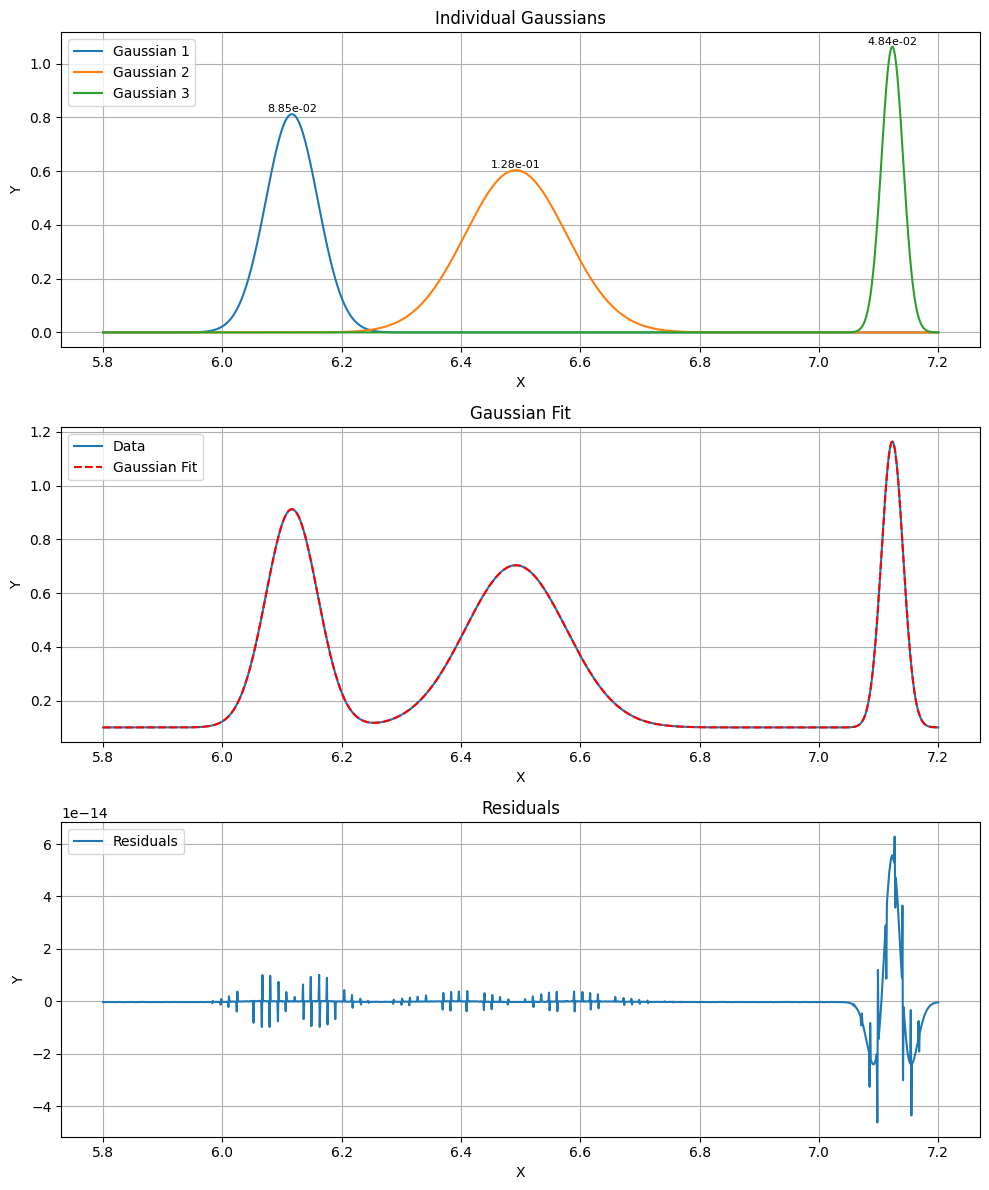

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Results saved as gaussian_fit_20250924_143654.xlsx and gaussian_plot_20250924_143654.png


In [10]:
# Export results
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
filename_csv = f"gaussian_fit_{timestamp}.csv"
filename_png = f"gaussian_plot_{timestamp}.png"
filename_xlsx = f"gaussian_fit_{timestamp}.xlsx"

# Save data
result_df = pd.DataFrame({'X': x, 'Y': y, 'Y_Fit': y_fit, 'Residuals': residuals})
print(result_df)
for i in range(num_gaussians):
  name = f"Gaussian {i+1}"
  result_df[name] = g_curve[i]

print(result_df)

#Write to file


with pd.ExcelWriter(filename_xlsx, engine='openpyxl') as writer:
    result_df.to_excel(writer, sheet_name='Data', index=False)
    fit_stats_df.to_excel(writer, sheet_name='Fit Statistics', index=False)
    areas_df.to_excel(writer, sheet_name='Areas', index=False)



#result_df.to_csv(filename_csv, index=False)





# Save plot

# Create combined figure
fig, axs = plt.subplots(3, 1, figsize=(10, 12))


for i in range(num_gaussians):
    axs[0].plot(x, g_curve[i], label=f'Gaussian {i+1}')
    area = np.trapz(g_curve[i], x)
    axs[0].text(popt[3*i+1], popt[3*i], f'{area:.2e}', ha='center', va='bottom', fontsize=8)
axs[0].set_title('Individual Gaussians')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].legend()
axs[0].grid(True)

# Subplot 2: Gaussian Fit
axs[1].plot(x, y, label='Data')
axs[1].plot(x, y_fit, 'r--', label='Gaussian Fit')
axs[1].set_title('Gaussian Fit')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].legend()
axs[1].grid(True)

# Subplot 3: Residuals
axs[2].plot(x, residuals, label='Residuals')
axs[2].set_title('Residuals')
axs[2].set_xlabel('X')
axs[2].set_ylabel('Y')
axs[2].legend()
axs[2].grid(True)

# Save figure
plt.tight_layout()
plt.savefig(filename_png)
plt.show()




# Trigger download

files.download(filename_png)
files.download(filename_xlsx)


print(f"✅ Results saved as {filename_xlsx} and {filename_png}")

